In [91]:
import numpy as np
from scipy import signal
from scipy import linalg
import matplotlib as mpl
import matplotlib.pyplot as plt

Num: 1048576


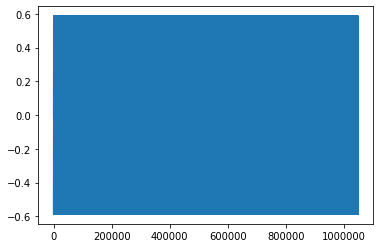

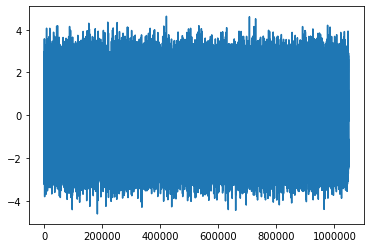

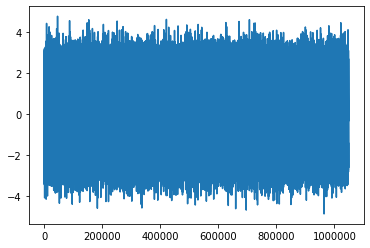

SNR: 0.08996827282254097
SNR(dB): -10.459106168648116


In [122]:
np.random.seed(123)

n = int(np.power(2., np.ceil(np.log2(1e6))))

print(f"Num: {n}")

fs = 1000.0
t = np.linspace(0, n, n, endpoint=False)
t /= fs

f_clean = 0.3*(np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t))
f_noise = np.random.randn(len(t))
f = f_clean + f_noise

plt.plot(f_clean)
plt.show()
plt.plot(f_noise)
plt.show()
plt.plot(f)
plt.show()

snr = np.var(f_clean)/np.var(f_noise)
print(f"SNR: {snr}")
snr_db = 10*np.log10(snr)
print(f"SNR(dB): {snr_db}")

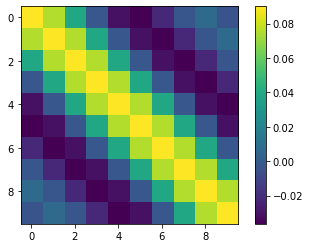

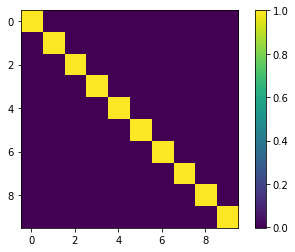

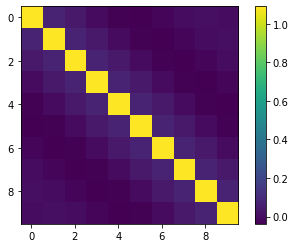

Noise only: 0.9981896197179718
Noise and signal: 1.0943276761145322
Diff: 0.09613805639656037


In [127]:
def pro_vec(y, t, l):
    return y[t:(t+l)]

def mult(y, t, l):
    return np.dot(pro_vec(y, t, l), pro_vec(y, t, l).T)
#     return np.outer(pro_vec(y, t, l), pro_vec(y, t, l)) 

def cal(y, l):
    y = y.reshape((-1, 1))
    r = np.zeros((l, l))
    for i in range(0, len(y)-l):
        r += mult(y, i, l)
    return r / (len(y)-l)

l = 10
c_clean = cal(f_clean, l)
c_noise = cal(f_noise, l)
c = cal(f, l)

# plt.imshow(cal(c_clean, l))
# plt.colorbar()
# plt.show()

# plt.imshow(cal(c_noise, l))
# plt.colorbar()
# plt.show()

# plt.imshow(cal(c, l))
# plt.colorbar()
# plt.show()

plt.imshow(c_clean)
plt.colorbar()
plt.show()

plt.imshow(c_noise)
plt.colorbar()
plt.show()

plt.imshow(c)
plt.colorbar()
plt.show()

def test1(x):
    t1 = x.sum()
    t2 = x.trace()
    return t1/t2

def test2(x):
    eig = linalg.eigvals(x)
    eig_max = np.max(eig)
    eig_min = np.min(eig)
    return eig_max/eig_min
    
print(f"Noise only: {test1(c_noise)}")
print(f"Noise and signal: {test1(c)}")
print(f"Diff: {test1(c)-test1(c_noise)}")